Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the data

In [3]:
df = pd.read_csv("D:\kaggle_project\Disease symptoms project\Disease_symptom_and_patient_profile_dataset.csv")

In [4]:
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
86,Malaria,Yes,No,No,No,35,Male,High,High,Positive
306,Otitis Media (Ear Infection),Yes,Yes,Yes,No,65,Male,Normal,Normal,Negative
198,Scoliosis,No,No,No,No,45,Female,High,High,Positive
47,Multiple Sclerosis,No,No,Yes,No,30,Female,High,High,Positive
162,Crohn's Disease,Yes,No,Yes,No,45,Male,High,Normal,Negative


In [5]:
# Checking Data Types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


Checking Null values

In [6]:
#checking for null values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
df.shape

(349, 10)

In [8]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [9]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

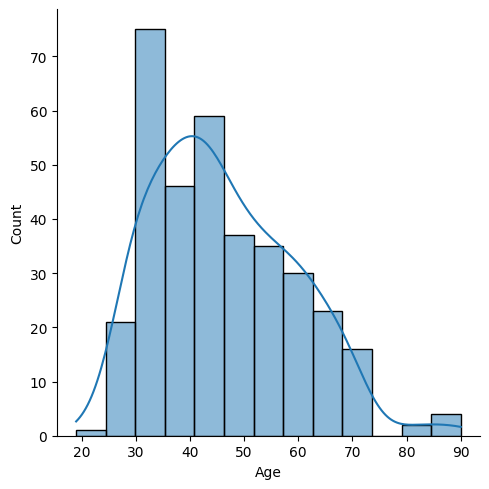

In [12]:
sns.displot(df['Age'] , kde=True)

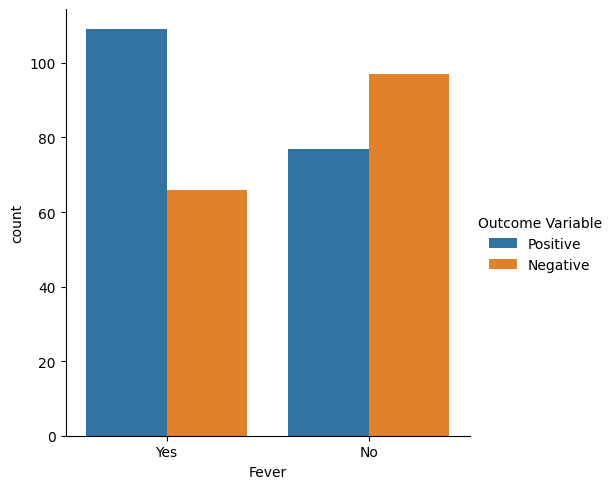

In [13]:
sns.catplot(x='Fever' , kind='count',data=df , hue = "Outcome Variable")

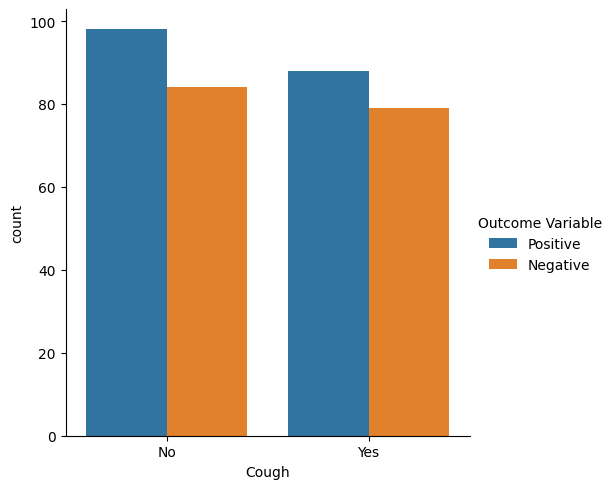

In [15]:
sns.catplot(x='Cough' , kind='count',data=df , hue = "Outcome Variable")

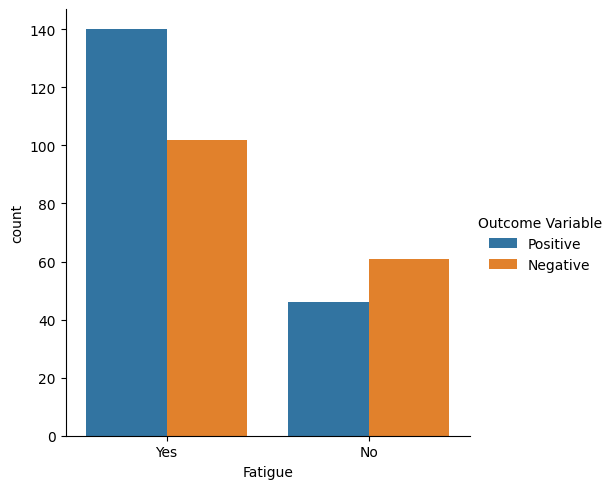

In [16]:
sns.catplot(x='Fatigue' , kind='count',data=df , hue = "Outcome Variable")

Classification model

In [17]:
#dropping name column
df = df.iloc[:,1:]

In [18]:
df.tail()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Yes,No,Yes,No,80,Female,High,High,Positive
345,Yes,No,Yes,No,85,Male,High,High,Positive
346,Yes,No,Yes,No,85,Male,High,High,Positive
347,Yes,No,Yes,No,90,Female,High,High,Positive
348,Yes,No,Yes,No,90,Female,High,High,Positive


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:8],df.iloc[:,-1],
                                                test_size=0.2)

In [21]:
x_train.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
321,Yes,Yes,Yes,No,65,Female,High,High
65,Yes,Yes,Yes,No,35,Female,High,Normal
263,Yes,Yes,No,No,55,Female,High,High
208,Yes,No,Yes,Yes,50,Female,High,High
345,Yes,No,Yes,No,85,Male,High,High


Encoding Categorical data

In [25]:
#importing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [26]:
oe = OrdinalEncoder(categories=[['No','Yes']])
x_train_fever = oe.fit_transform(x_train["Fever"].array.reshape(-1, 1))
x_test_fever = oe.transform(x_test["Fever"].array.reshape(-1, 1))

In [27]:
be = OrdinalEncoder(categories=[['No','Yes']])
x_train_cough = be.fit_transform(x_train["Cough"].array.reshape(-1, 1))
x_test_cough = be.transform(x_test["Cough"].array.reshape(-1, 1))

In [28]:
ce = OrdinalEncoder(categories=[['No','Yes']])
x_train_fat = ce.fit_transform(x_train["Fatigue"].array.reshape(-1, 1))
x_test_fat = ce.transform(x_test["Fatigue"].array.reshape(-1, 1))

In [29]:
de = OrdinalEncoder(categories=[['No','Yes']])
x_train_breath = de.fit_transform(x_train["Difficulty Breathing"].array.reshape(-1, 1))
x_test_breath = de.transform(x_test["Difficulty Breathing"].array.reshape(-1, 1))

In [30]:
fe = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_blood = fe.fit_transform(x_train["Blood Pressure"].array.reshape(-1, 1))
x_test_blood = fe.transform(x_test["Blood Pressure"].array.reshape(-1, 1))

In [31]:
ge = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_chol = ge.fit_transform(x_train["Cholesterol Level"].array.reshape(-1, 1))
x_test_chol = ge.transform(x_test["Cholesterol Level"].array.reshape(-1, 1))

In [32]:
ohe = OneHotEncoder(drop='first',sparse=False)
x_train_gender = ohe.fit_transform(x_train['Gender'].array.reshape(-1, 1))
x_test_gender = ohe.transform(x_test['Gender'].array.reshape(-1, 1))

c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
x_train_transformed = np.concatenate((x_train_fever,x_train_cough,x_train_fat,x_train_breath,x_train_blood,x_train_chol,x_train_gender),axis=1)

x_test_transformed = np.concatenate((x_test_fever,x_test_cough,x_test_fat,x_test_breath,x_test_blood,x_test_chol,x_test_gender),axis=1)

Decision tree

In [22]:
#importing library
from sklearn import tree

In [34]:
#implementing decision trees
dtr = tree.DecisionTreeClassifier()
dtr.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [35]:
#predicting values and testing accuracy
from sklearn.metrics import accuracy_score
dpred=dtr.predict(x_test_transformed)
accuracy_score(dpred,y_test)

0.7142857142857143

Random forest

In [36]:
#importing library
from sklearn.ensemble import RandomForestClassifier

In [37]:
#implementing random forests
rfr = RandomForestClassifier()
rfr.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [38]:
#predicting values and testing accuracy
fpred=rfr.predict(x_test_transformed)
accuracy_score(fpred,y_test)

0.7428571428571429

KNN

In [39]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#implementing KNN
knn = KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [41]:
#predicting values and testing accuracy
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.6571428571428571

Conclusion

Here's the accuracy of different classification models

Decision tree = 0.7142857142857143



Random forest = 0.7428571428571429

KNN = 0.6571428571428571